DPT
===

**Vision Transformers for Dense Prediction**

 * Paper: https://arxiv.org/abs/2103.13413

![DPT](../assets/dpt_overview.png)

```bash
pip install torch torchvision
pip install transformers
```

In [ ]:
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt
from transformers import DPTImageProcessor
from transformers import DPTForDepthEstimation

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

image_processor = DPTImageProcessor.from_pretrained(
    "Intel/dpt-hybrid-midas"
)
model = DPTForDepthEstimation.from_pretrained(
    "Intel/dpt-hybrid-midas", low_cpu_mem_usage=True
)

model.eval().to(device);

In [3]:
image_path = "../samples/plants.jpg"
image = Image.open(image_path).convert("RGB")

image = image.resize((image.width // 2, image.height // 2))

# prepare image for the model
inputs = image_processor(
    images=image, return_tensors="pt"
).to(device)

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

# visualize the prediction
output = prediction.squeeze().cpu().numpy()
depth = (output * 255 / np.max(output)).astype("uint8")
depth.shape

(568, 534)

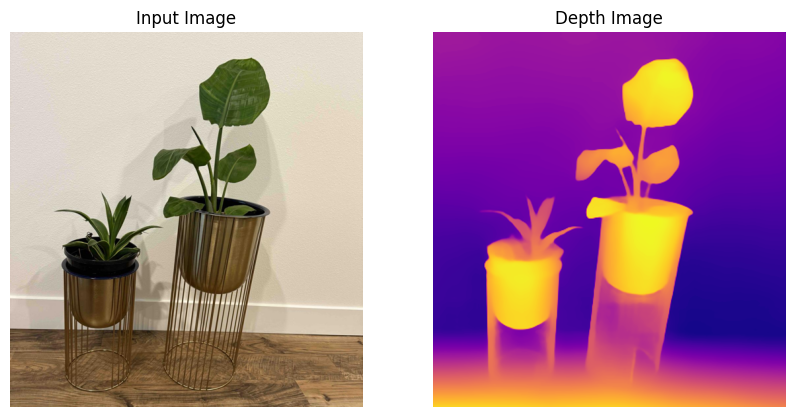

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].set_title("Input Image")
axes[0].axis("off")
axes[1].imshow(depth, cmap="plasma")
axes[1].set_title("Depth Image")
axes[1].axis("off")
plt.show()